In [43]:
# Basic setting
import pickle
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
# Making polynomial data
n = 2 # degree of the polynomial

roots = np.random.uniform(-1, 1, n)   # Generates random roots for a 5th degree polynomial
polyCoefficients = np.poly(roots)   # Find coefficients of polynomial that has said roots

X = np.arange(-100, 100)   # Randomly generated X values
y = np.polyval(polyCoefficients, X)   # Corresponding Y values passed through polynomial

delta = np.random.uniform(-5000, 5000, size=(200,))
y += delta

with open('midterm.pickle', 'wb') as f:
    pickle.dump([X, y], f)

In [45]:
# Load the dataset
with open('midterm.pickle', 'rb') as f:
    X, y = pickle.load(f)

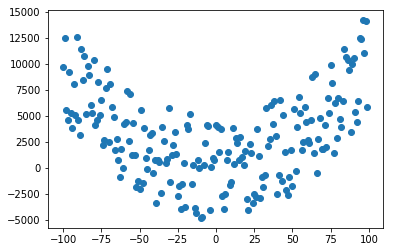

In [46]:
# Check the dataset distribution    
plt.scatter(X, y)
plt.show()

## [문제] 주어진 X, y의 데이터에 최적화된 2차 회귀 모델을 Tensorflow를 이용해 찾으시오.

### HINT
1. **2차 회귀 모형**
\begin{equation*}
f(x) = w_1X^2 + w_2X + b
\end{equation*}
2. **MSE loss (Mean Squared Error)**
\begin{equation*}
\left( \frac{1}{n} \sum_{i=1}^n (y_i - (wX_i + b))^2 \right)
\end{equation*}

In [47]:
# Training setting
epochs = 1000
learning_rate = 1e-8


#################################################
### Define model weights and bias parameters ###
w1 = tf.Variable(0.0)
w2 = tf.Variable(0.0)
b = tf.Variable(0.0)

# Perform Gradient Descent
for i in range(epochs):
    
####### Hint : Consider multiple weights  #######

    # Define MSE loss function (Hint: tf.GradientTape(), tf.reduce_mean())
    with tf.GradientTape() as tape:
        loss = tf.reduce_mean(tf.square(y - (w1*X**2 + w2*X + b)))
        
    # Get gradients of parameters (Hint: tape.gradient())
    dw1, dw2, db = tape.gradient(loss, [w1, w2, b])
    
    # Update model weights and bias (Hint : assign_sub())
    w1.assign_sub(learning_rate * dw1)
    w2.assign_sub(learning_rate * dw2)
    b.assign_sub(learning_rate * db)
    
#################################################
    
# Convert parameters type from tensor to numpy
w1 = w1.numpy()
w2 = w2.numpy()
b = b.numpy()

# Print the trained parameters value
print('Trained model weights 1 : %.4f' % w1)
print('Trained model weights 2 : %.4f' % w2)
print('Trained model bias : %.4f' % b)

Trained model weights 1 : 0.9658
Trained model weights 2 : 0.3074
Trained model bias : -0.0014


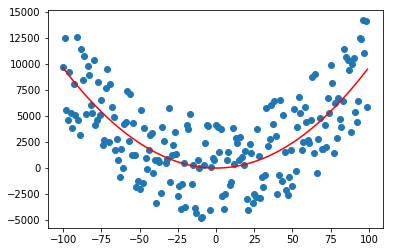

In [48]:
# Visualize the trained linear regression model
plt.scatter(X, y)   # scatter the original data
y_pred = w1*X**2 + w2*X + b
plt.plot(X, y_pred, color='red')
plt.show()